In [1]:
#Necessary libraries
import requests
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


#In order to scrap the data from Understat, I need requests, BeautifulSoup, JSON, and pandas packages.

#Neymar's Player ID in Understat is 2099
url1 = 'https://understat.com/player/2099'
html1 = requests.get(url1)
parse_soup1 = soup(html1.content, 'lxml')

scripts1 = parse_soup1.find_all('script')
strings1 = scripts1[3].string

ind_start1 = strings1.index("('") + 2
ind_end1 = strings1.index("')")

json_data1 = strings1[ind_start1: ind_end1]
json_data1 = json_data1.encode('utf8').decode('unicode_escape')

data1 = json.loads(json_data1)



x1 = []
y1 = []
xg1 = []
result1 = []
season1 = []

for i, _ in enumerate(data1):
    for key in data1[i]:
        if key == 'X':
            x1.append(data1[i] [key])
        if key == 'Y':
            y1.append(data1[i] [key])
        if key == 'xG':
            xg1.append(data1[i] [key])
        if key == 'result':
            result1.append(data1[i] [key])
        if key == 'season':
            season1.append(data1[i] [key])
            

columns = ['X', 'Y', 'xG', 'Result', 'Season']
neymar_understat = pd.DataFrame([x1, y1, xg1, result1, season1], index = columns)
neymar_understat = neymar_understat.T #.T is for transpose
neymar_understat = neymar_understat.apply(pd.to_numeric, errors = 'ignore')

#Kylian Mbappe-Lottin's Player ID in Understat is 3423
url2 = 'https://understat.com/player/3423'
html2 = requests.get(url2)
parse_soup2 = soup(html2.content, 'lxml')

scripts2 = parse_soup2.find_all('script')
strings2 = scripts2[3].string

ind_start2 = strings2.index("('") + 2
ind_end2 = strings2.index("')")

json_data2 = strings2[ind_start2:ind_end2]
json_data2 = json_data2.encode('utf8').decode('unicode_escape')

data2 = json.loads(json_data2)

x2 = []
y2 = []
xg2 = []
result2 = []
season2 = []

for i, _ in enumerate(data2):
    for key in data2[i]:
        if key == 'X':
            x2.append(data2[i] [key])
        if key == 'Y':
            y2.append(data2[i] [key])
        if key == 'xG':
            xg2.append(data2[i] [key])
        if key == 'result':
            result2.append(data2[i] [key])
        if key == 'season':
            season2.append(data2[i] [key])
            

columns = ['X', 'Y', 'xG', 'Result', 'Season']
mbappe_understat = pd.DataFrame([x2, y2, xg2, result2, season2], index = columns)
mbappe_understat = mbappe_understat.T #.T is for transpose
mbappe_understat = mbappe_understat.apply(pd.to_numeric, errors = 'ignore')

In [2]:
neymar_understat

,X,Y,xG,Result,Season
0,0.977,0.510,0.790566,BlockedShot,2014
1,0.899,0.530,0.315672,MissedShots,2014
2,0.927,0.534,0.085911,MissedShots,2014
3,0.808,0.680,0.047947,MissedShots,2014
4,0.880,0.590,0.340361,Goal,2014
...,...,...,...,...,...
651,0.904,0.542,0.502419,Goal,2021
652,0.879,0.550,0.299729,Goal,2021
653,0.776,0.357,0.070774,SavedShot,2021
654,0.880,0.643,0.040556,MissedShots,2021


In [3]:
mbappe_understat

,X,Y,xG,Result,Season
0,0.862,0.499,0.356220,Goal,2015
1,0.726,0.405,0.017181,BlockedShot,2015
2,0.740,0.336,0.012087,MissedShots,2015
3,0.765,0.367,0.041439,BlockedShot,2015
4,0.774,0.287,0.018032,SavedShot,2015
...,...,...,...,...,...
578,0.872,0.611,0.291630,MissedShots,2021
579,0.944,0.692,0.085022,MissedShots,2021
580,0.945,0.649,0.294718,BlockedShot,2021
581,0.917,0.714,0.162476,SavedShot,2021


In [4]:
#Scaling to 1000 for the opta pitch
neymar_understat['X'] = neymar_understat['X'].apply(lambda x:x * 100)
neymar_understat['Y'] = neymar_understat['Y'].apply(lambda y:y * 100)

mbappe_understat['X'] = mbappe_understat['X'].apply(lambda x:x * 100)
mbappe_understat['Y'] = mbappe_understat['Y'].apply(lambda y:y * 100)

In [5]:
neymar_understat

,X,Y,xG,Result,Season
0,97.699997,51.000000,0.790566,BlockedShot,2014
1,89.900002,53.000000,0.315672,MissedShots,2014
2,92.699997,53.400002,0.085911,MissedShots,2014
3,80.800003,68.000000,0.047947,MissedShots,2014
4,88.000000,59.000000,0.340361,Goal,2014
...,...,...,...,...,...
651,90.400002,54.200001,0.502419,Goal,2021
652,87.900002,55.000000,0.299729,Goal,2021
653,77.599998,35.700001,0.070774,SavedShot,2021
654,88.000000,64.300003,0.040556,MissedShots,2021


In [6]:
mbappe_understat

,X,Y,xG,Result,Season
0,86.199997,49.900002,0.356220,Goal,2015
1,72.599998,40.500000,0.017181,BlockedShot,2015
2,74.000000,33.599998,0.012087,MissedShots,2015
3,76.500000,36.700001,0.041439,BlockedShot,2015
4,77.400002,28.700001,0.018032,SavedShot,2015
...,...,...,...,...,...
578,87.199997,61.099998,0.291630,MissedShots,2021
579,94.400002,69.199997,0.085022,MissedShots,2021
580,94.500000,64.900002,0.294718,BlockedShot,2021
581,91.699997,71.400002,0.162476,SavedShot,2021


In [7]:
#Now I will be web scraping Fbref. I will be using the read_html function of pandas.
#It will return a list of all tables, but only we only need the first one, in order to get that we will index.
#We will also be creating a function to clean the data.
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]
    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace = True)
    df = df.fillna('0')
    df.set_index('Rk', drop = True, inplace = True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file: ' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors = 'ignore')
    return df

df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [8]:
df_fbref

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Max Aarons,ENG,DF,Norwich City,Premier League,22-114,2000,27.0,0,11,...,20.3,0,0,0,0.7,0.7,0.06,-0.7,-0.7,Matches
2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34-212,1987,29.1,2,18,...,18.6,0,0,0,1.2,1.2,0.07,0.8,0.8,Matches
3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22-033,2000,26.1,1,18,...,20.3,0,0,0,0.8,0.8,0.04,0.2,0.2,Matches
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29-086,1993,29.2,0,26,...,22.2,0,0,0,1.9,1.9,0.07,-1.9,-1.9,Matches
5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22-016,2000,0.5,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23-085,1999,23.8,1,14,...,16.1,0,0,0,1.2,1.2,0.09,-0.2,-0.2,Matches
2847,Szymon Żurkowski,POL,MF,Empoli,Serie A,24-215,1997,22.2,5,45,...,18.7,0,0,0,3.9,3.9,0.09,1.1,1.1,Matches
2848,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23-132,1998,26.0,6,42,...,20.2,10,0,0,4.1,4.1,0.10,1.9,1.9,Matches


In [9]:
#Plotting the data on to the dashboard. I will need two custom packages, mplsoccer and highlight-text.
from highlight_text import ax_text, fig_text
import mplsoccer

#I'm changing the default colors and fonts in Matplotlib using rcParams. For color hex codes use color picker by htmlcolorcodes.com
background = '#900C3F'
text_color = 'black'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['font.family'] = 'Candara'
mpl.rcParams['legend.fontsize'] = 15

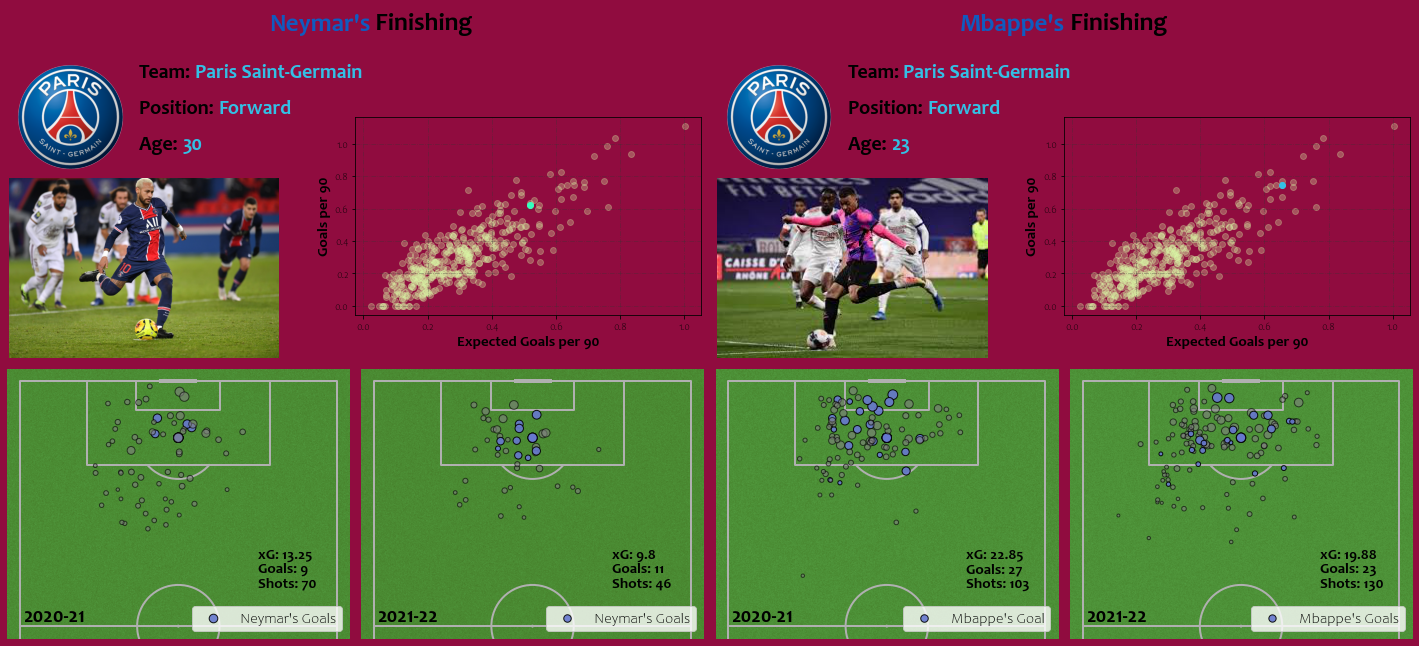

In [10]:
#Creating the plot

#Neymar

#Setting up the axes
fig1, ax1 = plt.subplots(figsize = (24, 10))
ax1.axis('off')
fig1.set_facecolor(background)

#Setting up the MPL axis for the first season
pitch = mplsoccer.VerticalPitch(half = True, pitch_type = 'opta', pitch_color = 'grass')
#First two parameters correspond to the (0,0) of the axis, the other two are for length and width
ax_opta1 = fig1.add_axes((0.01, 0.1, 0.375, 0.375)) 
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax = ax_opta1)

#Now plotting the Goals in the 2020-21 Season
df_fil = neymar_understat.loc[neymar_understat['Season'] == 2020]

pitch.scatter(df_fil[df_fil['Result'] == 'Goal']['X'],
              df_fil[df_fil['Result'] == 'Goal']['Y'],
              s = np.sqrt(df_fil[df_fil['Result'] == 'Goal']['xG']) * 100,
              marker = 'o',
              alpha = 0.9,
              edgecolor = 'black',
              facecolor = '#6778d0',
              ax = ax_opta1,
              label = "Neymar's Goals")

#Plotting other shots
pitch.scatter(df_fil[df_fil['Result'] != 'Goal']['X'],
              df_fil[df_fil['Result'] != 'Goal']['Y'],
              s = np.sqrt(df_fil[df_fil['Result'] != 'Goal']['xG']) * 100,
              marker = 'o',
              alpha = 0.6,
              edgecolor = 'black',
              facecolor = 'grey',
              ax = ax_opta1)

#Adding the Legend
ax_opta1.legend(loc = 'lower right').get_texts()[0].set_color("black")

#Adding additional information to the graph. Use text method of the axes object.
ax_opta1.text(25, 61, 'Goals: ' + str(len(df_fil[df_fil['Result'] == 'Goal'])),
              weight = 'bold',
              size = 15)
ax_opta1.text(25, 64, f"xG: {round(sum(df_fil['xG']), 2)}",
              weight = 'bold',
              size = 15)
ax_opta1.text(25, 58, 'Shots: ' + str(len(df_fil)),
              weight = 'bold',
              size = 15)
ax_opta1.text(99, 51, '2020-21',
              weight = 'bold',
              size = 20)


#Mbappe

#Setting up the MPL axis for the first season
pitch = mplsoccer.VerticalPitch(half = True, pitch_type = 'opta', pitch_color = 'grass')
#First two parameters correspond to the (0,0) of the axis, the other two are for length and width
ax_opta1 = fig1.add_axes((0.42, 0.1, 0.375, 0.375)) 
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax = ax_opta1)

#Now plotting the Goals in the 2020-21 Season
df_fil = mbappe_understat.loc[mbappe_understat['Season'] == 2020]

pitch.scatter(df_fil[df_fil['Result'] == 'Goal']['X'],
              df_fil[df_fil['Result'] == 'Goal']['Y'],
              s = np.sqrt(df_fil[df_fil['Result'] == 'Goal']['xG']) * 100,
              marker = 'o',
              alpha = 0.9,
              edgecolor = 'black',
              facecolor = '#6778d0',
              ax = ax_opta1,
              label = "Mbappe's Goal")

#Plotting other shots
pitch.scatter(df_fil[df_fil['Result'] != 'Goal']['X'],
              df_fil[df_fil['Result'] != 'Goal']['Y'],
              s = np.sqrt(df_fil[df_fil['Result'] != 'Goal']['xG']) * 100,
              marker = 'o',
              alpha = 0.6,
              edgecolor = 'black',
              facecolor = 'grey',
              ax = ax_opta1)

#Adding the Legend
ax_opta1.legend(loc = 'lower right').get_texts()[0].set_color("black")

#Adding additional information to the graph. Use text method of the axes object.
ax_opta1.text(25, 61, 'Goals: ' + str(len(df_fil[df_fil['Result'] == 'Goal'])),
              weight = 'bold',
              size = 15)
ax_opta1.text(25, 64, f"xG: {round(sum(df_fil['xG']), 2)}",
              weight = 'bold',
              size = 15)
ax_opta1.text(25, 58, 'Shots: ' + str(len(df_fil)),
              weight = 'bold',
              size = 15)
ax_opta1.text(99, 51, '2020-21',
              weight = 'bold',
              size = 20)


#Making another plot for the 2021-22 Season
ax_opta2 = fig1.add_axes((0.215, 0.1, 0.375, 0.375))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax = ax_opta2)

#Plotting other shots
df_fil = neymar_understat.loc[neymar_understat['Season'] == 2021]

pitch.scatter(df_fil[df_fil['Result'] != 'Goal']['X'],
              df_fil[df_fil['Result'] != 'Goal']['Y'],
              s = np.sqrt(df_fil[df_fil['Result'] != 'Goal']['xG']) * 100,
              marker = 'o',
              alpha = 0.6,
              edgecolor = 'black',
              facecolor = 'grey',
              ax = ax_opta2)

#Now plotting the Goals in the 2021-22 Season
pitch.scatter(df_fil[df_fil['Result'] == 'Goal']['X'],
              df_fil[df_fil['Result'] == 'Goal']['Y'],
              s = np.sqrt(df_fil[df_fil['Result'] == 'Goal']['xG']) * 100,
              marker = 'o',
              alpha = 0.9,
              edgecolor = 'black',
              facecolor = '#6778d0',
              ax = ax_opta2,
              label = "Neymar's Goals")

#Adding the Legend
ax_opta2.legend(loc = 'lower right').get_texts()[0].set_color("black")

ax_opta2.text(25, 61, 'Goals: ' + str(len(df_fil[df_fil['Result'] == 'Goal'])),
              weight = 'bold',
              size = 15)
ax_opta2.text(25, 64, f"xG: {round(sum(df_fil['xG']), 2)}",
              weight = 'bold',
              size = 15)
ax_opta2.text(25, 58, 'Shots: '+str(len(df_fil)),
              weight = 'bold',
              size = 15)
ax_opta2.text(99, 51, '2021-22',
              weight = 'bold',
              size = 20)

#Making another plot for the 2021-22 Season
ax_opta2 = fig1.add_axes((0.625, 0.1, 0.375, 0.375))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax = ax_opta2)

#Plotting other shots
df_fil = mbappe_understat.loc[mbappe_understat['Season'] == 2021]

pitch.scatter(df_fil[df_fil['Result'] != 'Goal']['X'],
              df_fil[df_fil['Result'] != 'Goal']['Y'],
              s = np.sqrt(df_fil[df_fil['Result'] != 'Goal']['xG']) * 100,
              marker = 'o',
              alpha = 0.6,
              edgecolor = 'black',
              facecolor = 'grey',
              ax = ax_opta2)

#Now plotting the Goals in the 2021-22 Season
pitch.scatter(df_fil[df_fil['Result'] == 'Goal']['X'],
              df_fil[df_fil['Result'] == 'Goal']['Y'],
              s = np.sqrt(df_fil[df_fil['Result'] == 'Goal']['xG']) * 100,
              marker = 'o',
              alpha = 0.9,
              edgecolor = 'black',
              facecolor = '#6778d0',
              ax = ax_opta2,
              label = "Mbappe's Goals")

#Adding the Legend
ax_opta2.legend(loc = 'lower right').get_texts()[0].set_color("black")

ax_opta2.text(25, 61, 'Goals: ' + str(len(df_fil[df_fil['Result'] == 'Goal'])),
              weight = 'bold',
              size = 15)
ax_opta2.text(25, 64, f"xG: {round(sum(df_fil['xG']), 2)}",
              weight = 'bold',
              size = 15)
ax_opta2.text(25, 58, 'Shots: '+str(len(df_fil)),
              weight = 'bold',
              size = 15)
ax_opta2.text(99, 51, '2021-22',
              weight = 'bold',
              size = 20)



#Neymar Scatterplot

#Now plotting the Scatterplot
ax_scatter = fig1.add_axes([0.3, 0.55, 0.2, 0.275])
ax_scatter.patch.set_facecolor(background)

#Setting up the X and Y of the scatterplot
no_90s = 10
df_fil = df_fbref[df_fbref['90s'] >= no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW', 'MF,FW', 'FW,MF'])]

x, y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()

ax_scatter.scatter(x, y, alpha = 0.3, c = '#DAF7A6')

#Filtering Neymar's Data
neymar_player = df_fil[df_fil['Player'] == 'Neymar']
ax_scatter.scatter(neymar_player['xG']/neymar_player['90s'], neymar_player['Gls']/neymar_player['90s'], c = '#33FFBD')

#Adding finishing touches to the scatterplot
ax_scatter.grid(b = True, color = '#363734', linestyle = '-.', linewidth = 0.75, alpha = 0.4)
ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize': 15, 'weight': 'bold', 'color': text_color})
ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 15, weight = 'bold', color = text_color))

#Adding Neymar's image
ax_player = fig1.add_axes([-0.01, 0.49, 0.375, 0.25])
ax_player.axis('off')
im = plt.imread('neymar2.jfif')
ax_player.imshow(im)

#Adding Titles and Info
fig_text(0.25, 0.97, "<Neymar's> Finishing", weight = 'heavy',
         size = 25,
         highlight_textprops = [{'color': '#105BBF'}])
fig_text(0.175, 0.90, "Team: <Paris Saint-Germain>", weight = 'bold',
         size = 20,
         highlight_textprops = [{'color': '#33C0E5'}])
fig_text(0.175, 0.85, "Position: <Forward>", weight = 'bold',
         size = 20,
         highlight_textprops = [{'color': '#33C0E5'}])
fig_text(0.175, 0.80, "Age: <30>", weight = 'bold',
         size = 20,
         highlight_textprops = [{'color': '#33C0E5'}])

#Adding club logo
ax_team = fig1.add_axes([0.06, 0.75, 0.15, 0.15])
ax_team.axis('off')
im = plt.imread('psg.jpg')
ax_team.imshow(im)






#Mbappe Scatterplot

#Now plotting the Scatterplot
ax_scatter = fig1.add_axes([0.71, 0.55, 0.2, 0.275])
ax_scatter.patch.set_facecolor(background)

#Setting up the X and Y of the scatterplot
no_90s = 10
df_fil = df_fbref[df_fbref['90s'] >= no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW', 'MF,FW', 'FW,MF'])]

x, y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()

ax_scatter.scatter(x, y, alpha = 0.3, c = '#DAF7A6')

#Filtering Kylian Mbappe's Data
mbappe_player = df_fil[df_fil['Player'] == 'Kylian Mbappé']
ax_scatter.scatter(mbappe_player['xG']/mbappe_player['90s'], mbappe_player['Gls']/mbappe_player['90s'], c = '#33C0E5')

#Adding finishing touches to the scatterplot
ax_scatter.grid(b = True, color = '#363734', linestyle = '-.', linewidth = 0.75, alpha = 0.4)
ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize': 15, 'weight': 'bold', 'color': text_color})
ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 15, weight = 'bold', color = text_color))

#Adding Mbappe's image
ax_player = fig1.add_axes([0.4, 0.49, 0.375, 0.25])
ax_player.axis('off')
im = plt.imread('mbappe2.jfif')
ax_player.imshow(im)

#Adding Titles and Info
fig_text(0.65, 0.97, "<Mbappe's> Finishing", weight = 'heavy',
         size = 25,
         highlight_textprops = [{'color': '#105BBF'}])
fig_text(0.585, 0.90, "Team: <Paris Saint-Germain>", weight = 'bold',
         size = 20,
         highlight_textprops = [{'color': '#33C0E5'}])
fig_text(0.585, 0.85, "Position: <Forward>", weight = 'bold',
         size = 20,
         highlight_textprops = [{'color': '#33C0E5'}])
fig_text(0.585, 0.80, "Age: <23>", weight = 'bold',
         size = 20,
         highlight_textprops = [{'color': '#33C0E5'}])

#Adding club logo
ax_team = fig1.add_axes([0.47, 0.75, 0.15, 0.15])
ax_team.axis('off')
im = plt.imread('psg.jpg')
ax_team.imshow(im)
